# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout

from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle

import tensorflow as tf
import os

# BRAIN TUMOR DETECTION

## Importing Data and Data Preprocessing

In [56]:
IMAGES = []
LABELS = []

labels = ['glioma','meningioma','notumor','pituitary']

#TRAIN
for i in labels:
    folder_path = os.path.join('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Training',i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img , (150,150))
        IMAGES.append(img)
        LABELS.append(i)

#TEST
for i in labels:
    folder_path = os.path.join('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing',i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img , (150,150))
        IMAGES.append(img)
        LABELS.append(i)

## Data Visualization

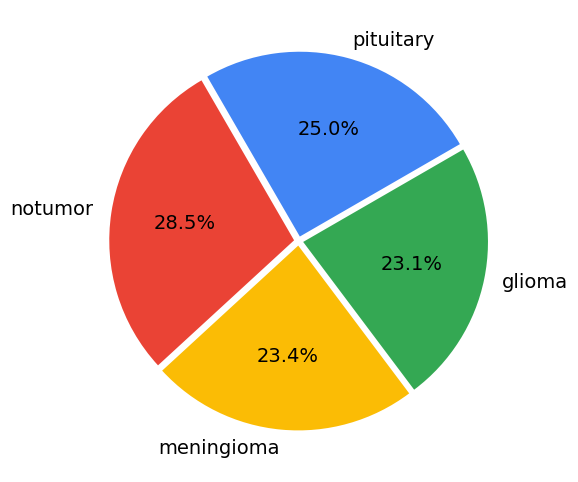

In [57]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in LABELS if x=='pituitary']),
         len([x for x in LABELS if x=='notumor']),
         len([x for x in LABELS if x=='meningioma']),
         len([x for x in LABELS if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

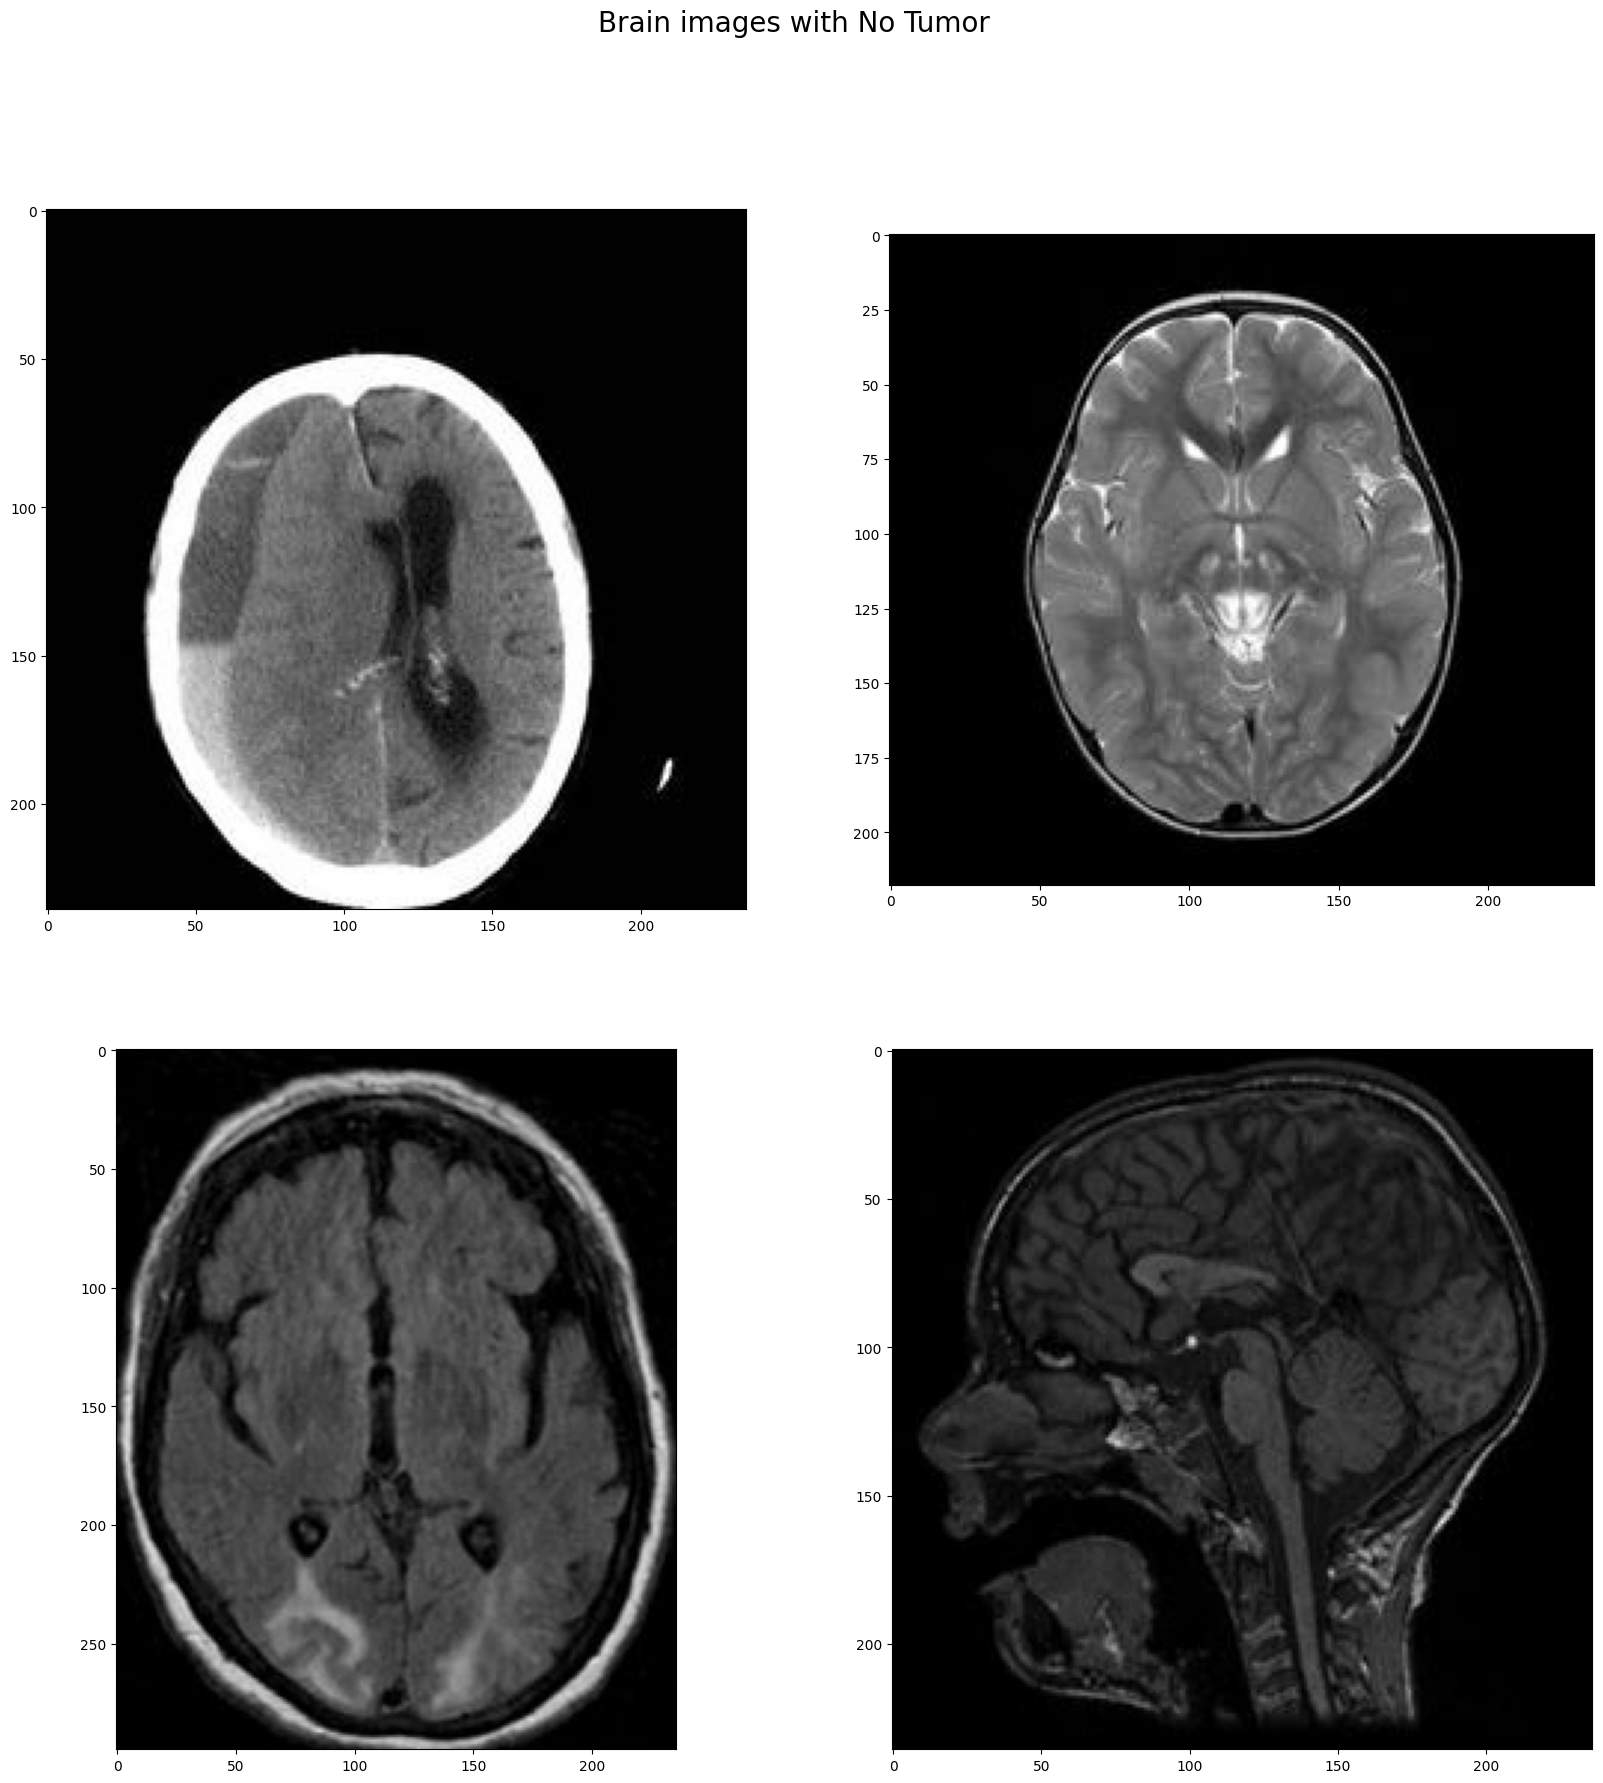

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/no_tumor/image(1).jpg')
plt.imshow(img)

plt.subplot(2, 2, 2)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/no_tumor/image(2).jpg')
plt.imshow(img)

plt.subplot(2, 2, 3)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/no_tumor/image(3).jpg')
plt.imshow(img)

plt.subplot(2, 2, 4)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/no_tumor/image(4).jpg')
plt.imshow(img)

plt.suptitle("Brain images with No Tumor",fontsize=20)
plt.show()

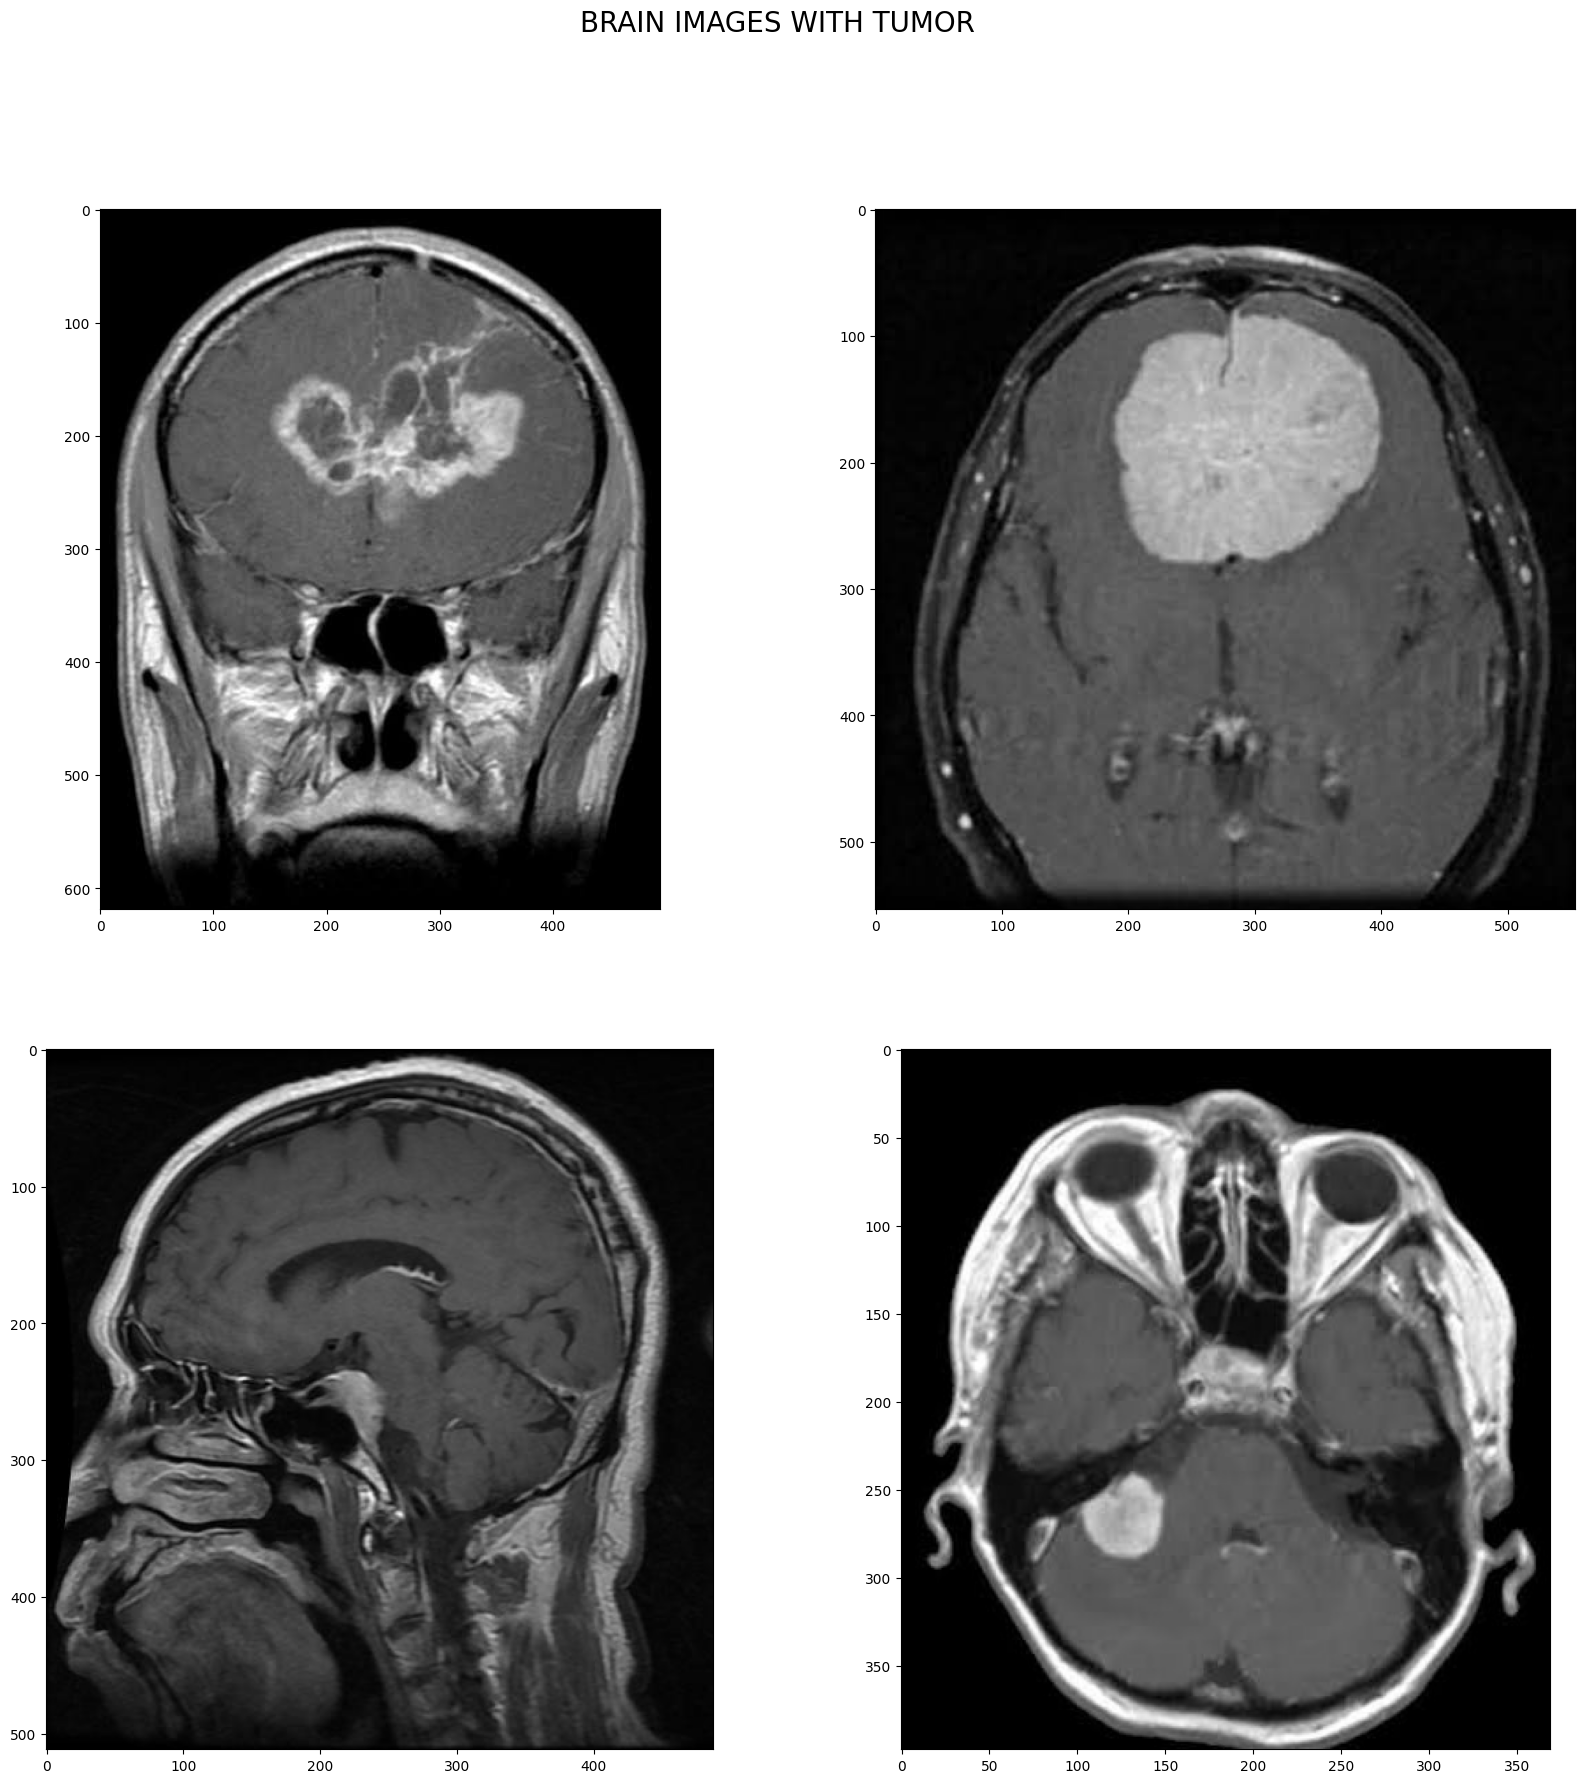

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/glioma_tumor/image(1).jpg')
plt.imshow(img)

plt.subplot(2, 2, 2)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/meningioma_tumor/image(2).jpg')
plt.imshow(img)

plt.subplot(2, 2, 3)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/pituitary_tumor/image(3).jpg')
plt.imshow(img)

plt.subplot(2, 2, 4)
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/meningioma_tumor/image(4).jpg')
plt.imshow(img)

plt.suptitle("BRAIN IMAGES WITH TUMOR",fontsize=20)
plt.show()

In [14]:
IMAGES = np.array(IMAGES)
LABELS = np.array(LABELS)

In [15]:
IMAGES,LABELS = shuffle(IMAGES,LABELS, random_state = 100)

In [16]:
IMAGES.shape

(7023, 150, 150, 3)

In [17]:
LABELS.shape

(7023,)

## Train Test Split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(IMAGES,
                                                 LABELS, 
                                                 test_size=0.1, 
                                                 random_state=100)

In [19]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# CNN Model - BRAIN TUMOR DETECTION

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

#OUTPUT
model.add(Dense(4,activation='softmax'))  #soft-max gives probability of each 4 tumor

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

## Model Training

In [23]:
history = model.fit(X_train,y_train, epochs=22, validation_split=0.1)

Epoch 1/22


178/178 [==============================] - 242s 1s/step - loss: 1.6102 - accuracy: 0.3150 - val_loss: 1.3831 - val_accuracy: 0.2453
Epoch 2/22
178/178 [==============================] - 274s 2s/step - loss: 1.1215 - accuracy: 0.4866 - val_loss: 1.0649 - val_accuracy: 0.5206
Epoch 3/22
178/178 [==============================] - 281s 2s/step - loss: 0.8026 - accuracy: 0.6660 - val_loss: 0.8821 - val_accuracy: 0.6234
Epoch 4/22
178/178 [==============================] - 268s 2s/step - loss: 0.6360 - accuracy: 0.7433 - val_loss: 1.0022 - val_accuracy: 0.6282
Epoch 5/22
178/178 [==============================] - 239s 1s/step - loss: 0.5226 - accuracy: 0.7822 - val_loss: 0.7843 - val_accuracy: 0.6978
Epoch 6/22
178/178 [==============================] - 239s 1s/step - loss: 0.4650 - accuracy: 0.8100 - val_loss: 0.7714 - val_accuracy: 0.6946
Epoch 7/22
178/178 [==============================] - 242s 1s/step - loss: 0.3864 - accuracy: 0.8467 - val_loss: 0.9376 - val_accuracy: 0.65

# Plot Accuracy and Loss

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

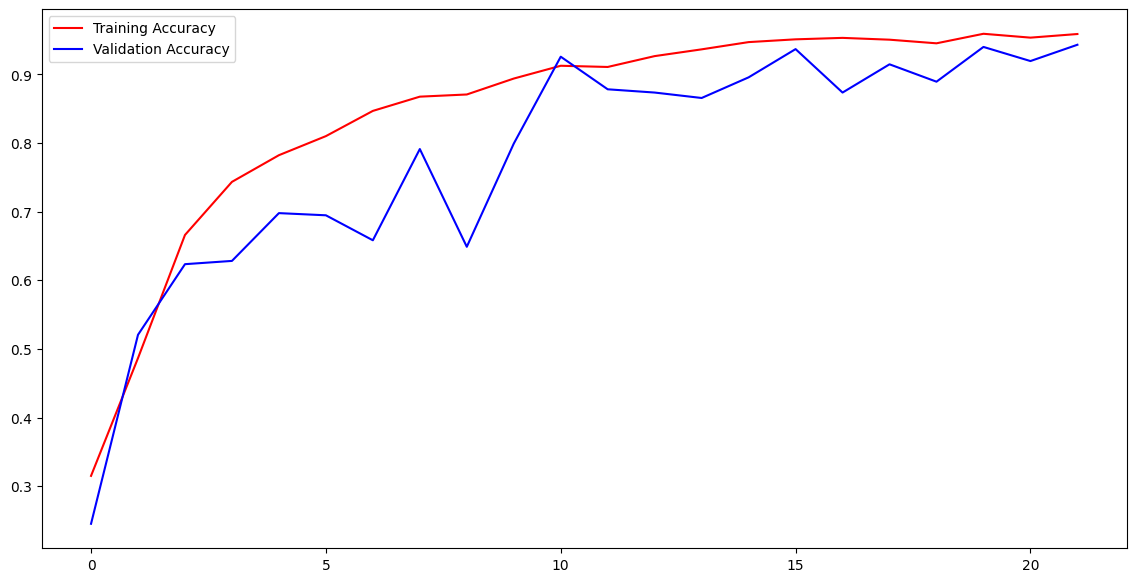

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r',label = "Training Accuracy")
plt.plot(epochs,val_acc,'b',label = "Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

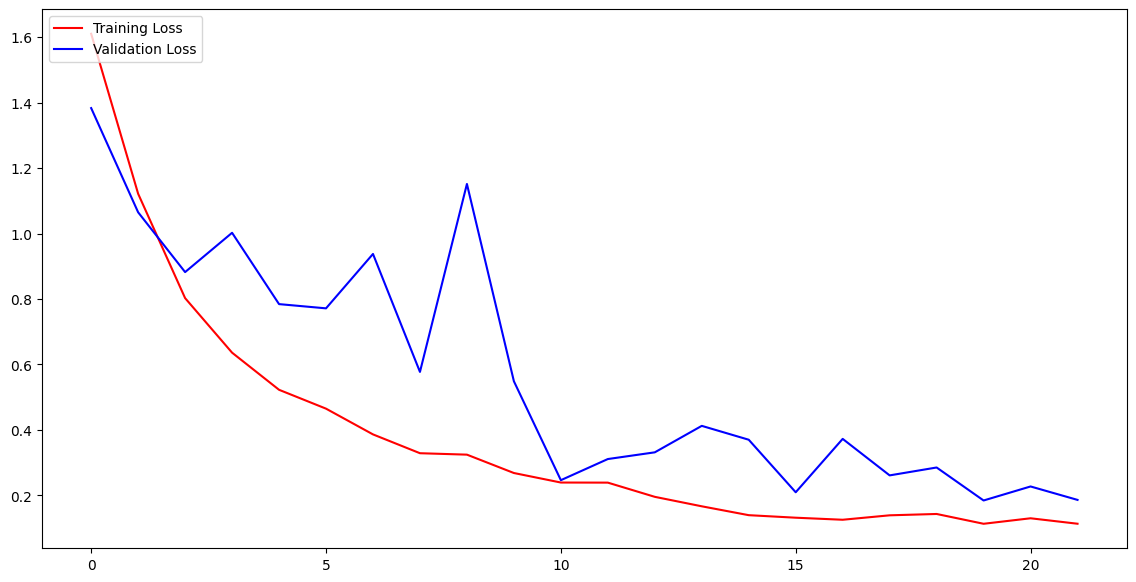

In [34]:
loss = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss,'r',label = "Training Loss")
plt.plot(epochs,val_acc,'b',label = "Validation Loss")
plt.legend(loc='upper left')
plt.show()

# Prediction

In [38]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/pituitary/Te-pi_0010.jpg')

In [39]:
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [40]:
img_array = img_array.reshape(1,150,150,3)
img_array
img_array.shape

(1, 150, 150, 3)

1/1 [==============================] - 0s 40ms/step
pituitary


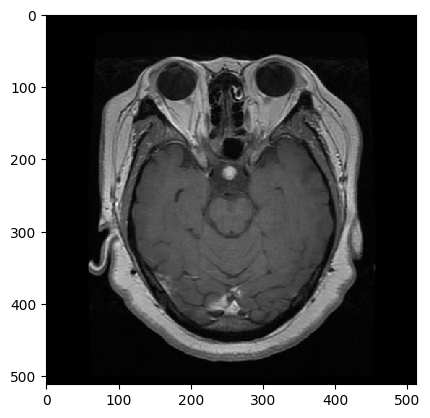

In [44]:
from tensorflow.keras.preprocessing import image

img = image.load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/pituitary/Te-pi_0010.jpg')
plt.imshow(img,interpolation='nearest')

a = model.predict(img_array)
index = a.argmax()

#['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
Prediction = labels[index]
print(Prediction)

1/1 [==============================] - 0s 37ms/step
glioma


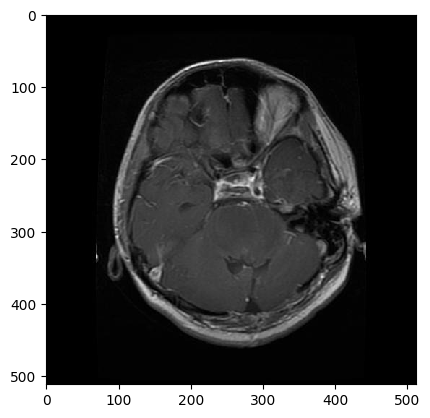

In [48]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/glioma/Te-gl_0010.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

img = image.load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/glioma/Te-gl_0010.jpg')
plt.imshow(img,interpolation='nearest')

a = model.predict(img_array)
index = a.argmax()

#['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
Prediction = labels[index]
print(Prediction)

1/1 [==============================] - 0s 38ms/step
notumor


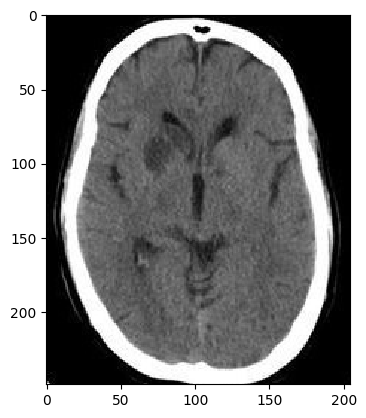

In [49]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/notumor/Te-no_0010.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

img = image.load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/notumor/Te-no_0010.jpg')
plt.imshow(img,interpolation='nearest')

a = model.predict(img_array)
index = a.argmax()

#['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
Prediction = labels[index]
print(Prediction)

1/1 [==============================] - 0s 38ms/step
meningioma


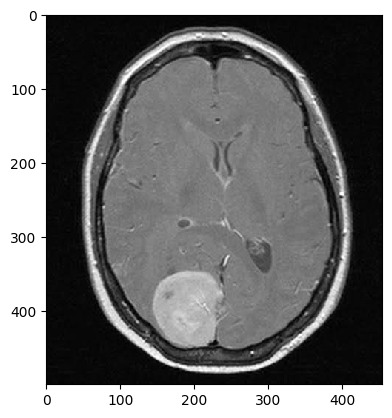

In [51]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/meningioma/Te-me_0010.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

img = image.load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset 2/Testing/meningioma/Te-me_0010.jpg')
plt.imshow(img,interpolation='nearest')

a = model.predict(img_array)
index = a.argmax()

#['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
Prediction = labels[index]
print(Prediction)

In [46]:
model.save('tumor.h5')
model.save('tumor.keras')

c:\users\mukhi2206\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# PNEUMONIA DETECTION

In [28]:
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

## Data

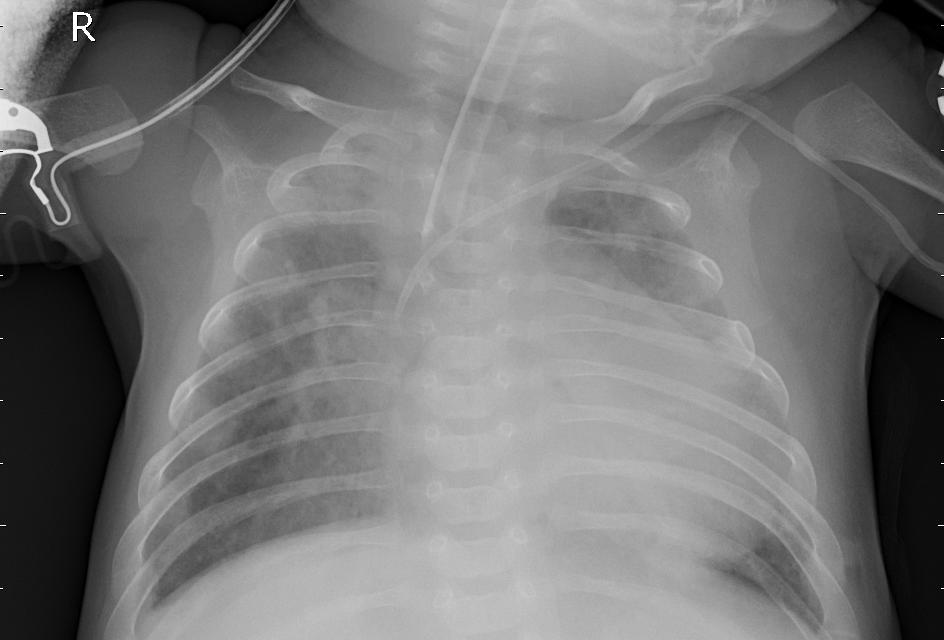

In [29]:
pneumonia_positive = PIL.Image.open('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/PNEUMONIA/person1_virus_6.jpeg')
pneumonia_positive

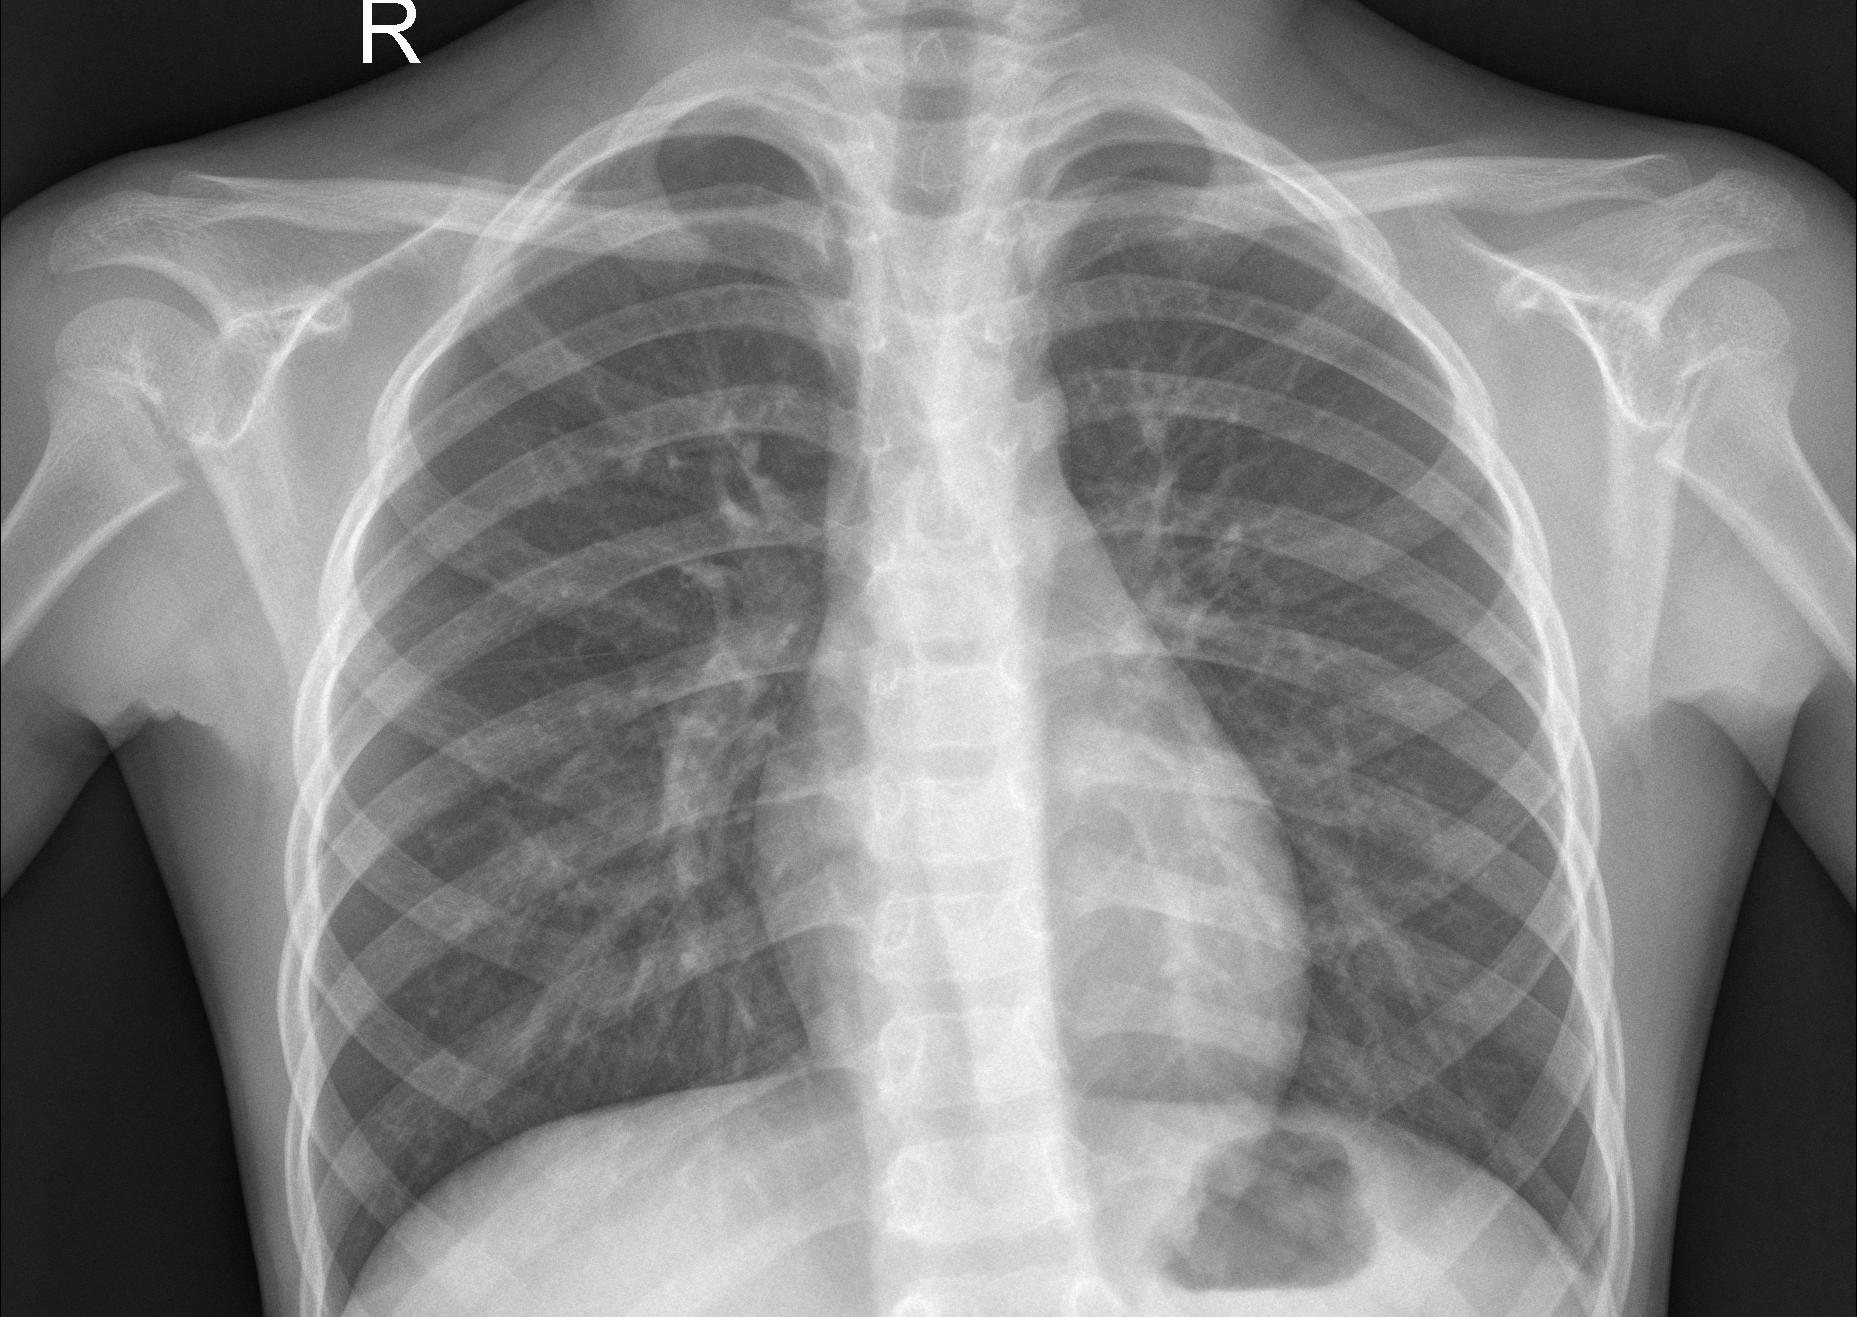

In [30]:
Normal = PIL.Image.open('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/NORMAL/IM-0001-0001.jpeg')
Normal

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing Data

In [32]:
train_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/train"
val_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/val"
test_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test"

## Data Visualization

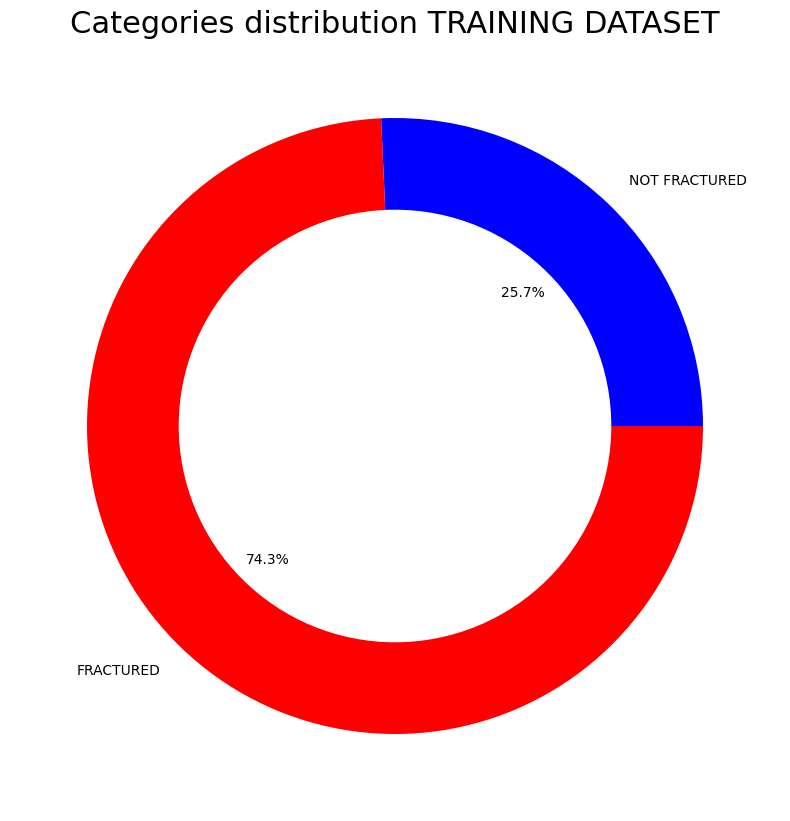

In [37]:
train_no_pnemonia = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/train/NORMAL/'
normal_files = os.listdir(train_no_pnemonia)
train_pneumonia = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/train/PNEUMONIA/'
pneumonia_files = os.listdir(train_pneumonia)

def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()
    
data = [len (normal_files) , len (pneumonia_files) ]
labels = ['NOT FRACTURED' , 'FRACTURED' ]
colors = ['blue','red']
plt_pie (data,labels,colors , 'Categories distribution TRAINING DATASET')

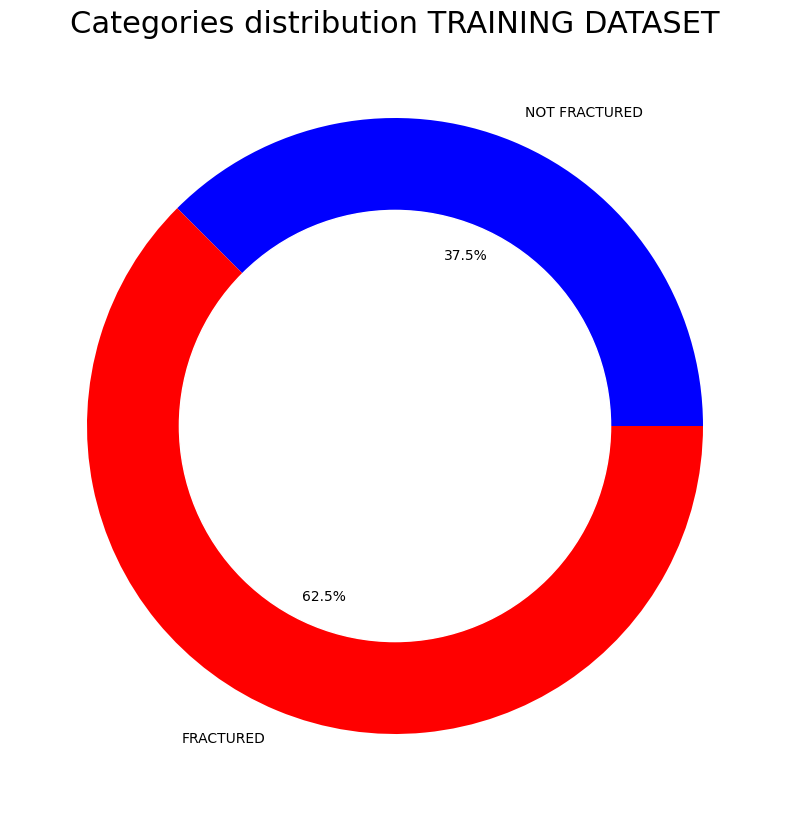

In [38]:
test_no_pnemonia = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/NORMAL/'
normal_files = os.listdir(test_no_pnemonia)
test_pneumonia = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/PNEUMONIA/'
pneumonia_files = os.listdir(test_pneumonia)

def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()
    
data = [len (normal_files) , len (pneumonia_files) ]
labels = ['NOT FRACTURED' , 'FRACTURED' ]
colors = ['blue','red']
plt_pie (data,labels,colors , 'Categories distribution TRAINING DATASET')

## Data Pre-processing

In [39]:
train_gen = ImageDataGenerator(rescale=1/255)
data_train = train_gen.flow_from_directory(train_dir, 
                                           target_size=(120,120),
                                           batch_size=8,
                                           class_mode="binary")

Found 5216 images belonging to 2 classes.


In [40]:
val_gen = ImageDataGenerator(rescale=1/255)
data_val = val_gen.flow_from_directory(val_dir, 
                                       target_size=(120,120),
                                       batch_size=8,
                                       class_mode="binary")

Found 16 images belonging to 2 classes.


In [41]:
test_gen = ImageDataGenerator(rescale=1/255)
data_test = test_gen.flow_from_directory(test_dir, 
                                         target_size=(120,120),
                                         batch_size=8,
                                         class_mode="binary")

Found 624 images belonging to 2 classes.


# CNN Model PNEUMONIA DETECTION

In [42]:
pnem_model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2), 
                             
                             tf.keras.layers.Conv2D(128, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(256, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(512, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),

                             #tf.keras.layers.Conv2D(1024, (3,3), activation="relu"), 
                             #tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Flatten(), 
                             tf.keras.layers.Dense(256, activation= 'sigmoid'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')])

In [43]:
pnem_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 128)      

In [44]:
pnem_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy", 
              metrics= ["acc"])

## Model Training

In [45]:
history = pnem_model.fit_generator(data_train, epochs=8, validation_data = data_val) 

C:\Users\Mukhi2206\AppData\Local\Temp\ipykernel_7860\1357805609.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = pnem_model.fit_generator(data_train, epochs=8, validation_data = data_val)


Epoch 1/8
652/652 [==============================] - 124s 188ms/step - loss: 0.3462 - acc: 0.8508 - val_loss: 0.3210 - val_acc: 0.8125
Epoch 2/8
652/652 [==============================] - 74s 113ms/step - loss: 0.1631 - acc: 0.9371 - val_loss: 0.9195 - val_acc: 0.6250
Epoch 3/8
652/652 [==============================] - 73s 111ms/step - loss: 0.1259 - acc: 0.9479 - val_loss: 0.3501 - val_acc: 0.7500
Epoch 4/8
652/652 [==============================] - 72s 110ms/step - loss: 0.1086 - acc: 0.9599 - val_loss: 0.0853 - val_acc: 1.0000
Epoch 5/8
652/652 [==============================] - 71s 108ms/step - loss: 0.0887 - acc: 0.9663 - val_loss: 0.4155 - val_acc: 0.8750
Epoch 6/8
652/652 [==============================] - 72s 110ms/step - loss: 0.0801 - acc: 0.9682 - val_loss: 0.0529 - val_acc: 1.0000
Epoch 7/8
652/652 [==============================] - 73s 111ms/step - loss: 0.0643 - acc: 0.9749 - val_loss: 0.2591 - val_acc: 0.9375
Epoch 8/8
652/652 [==============================] - 69s 106m

## Plot Accuracy and Loss

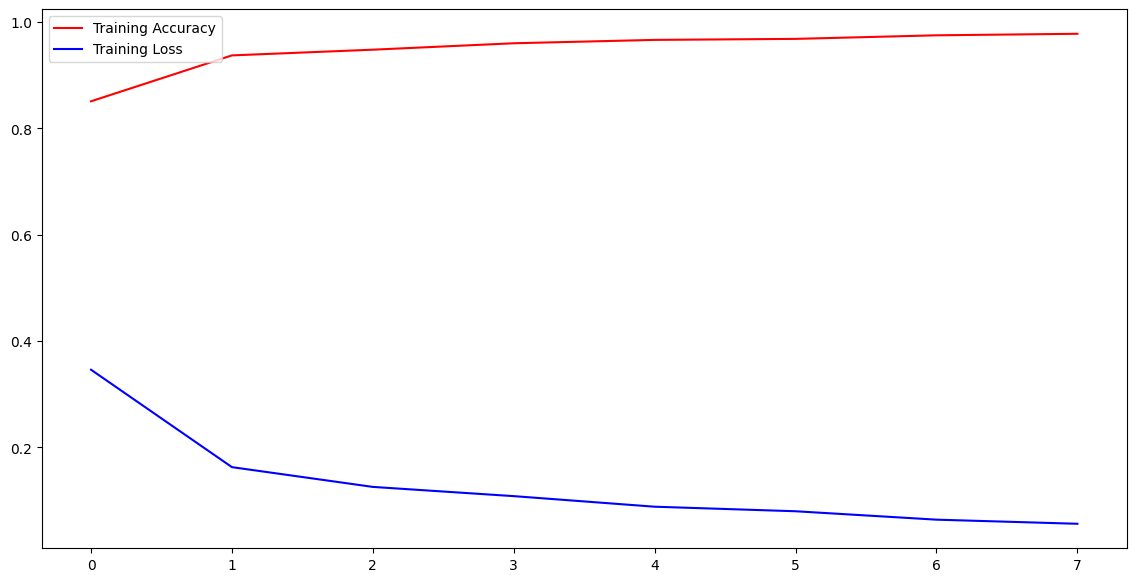

In [46]:
from sklearn.metrics import accuracy_score

acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r',label = "Training Accuracy")
plt.plot(epochs,loss,'b',label = "Training Loss")
plt.legend(loc='upper left')
plt.show()

## Model Score

In [47]:
pnem_model.evaluate(data_test)

78/78 [==============================] - 13s 162ms/step - loss: 1.2012 - acc: 0.7756


[1.201244831085205, 0.7756410241127014]

In [48]:
pnem_model.evaluate(data_val)

2/2 [==============================] - 0s 152ms/step - loss: 0.3203 - acc: 0.8750


[0.3202846646308899, 0.875]

In [49]:
predictions=pnem_model.predict(data_val)
predictions

2/2 [==============================] - 0s 72ms/step


array([[0.99954826],
       [0.0023983 ],
       [0.04156364],
       [0.09464278],
       [0.9999822 ],
       [0.99996585],
       [0.03319735],
       [0.9999927 ],
       [0.99988633],
       [0.6601338 ],
       [0.14981957],
       [0.99995965],
       [0.9715394 ],
       [0.99992007],
       [0.13064727],
       [0.9949948 ]], dtype=float32)

# Predictions

1/1 [==============================] - 0s 122ms/step
[[0.00855385]]
RESULT : Normal


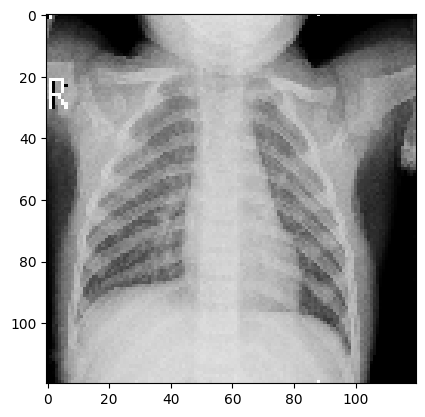

In [50]:
from tensorflow.keras.utils import load_img, img_to_array
img1 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/val/NORMAL/NORMAL2-IM-1430-0001.jpeg',target_size=(120,120))
imag1 = img_to_array(img1)
imaga1 = np.expand_dims(imag1,axis=0) 

ypred1 = pnem_model.predict(imaga1)
print(ypred1)
a=ypred1[0]
if a>0.5:
      op="Pneumonia"   
else:
      op="Normal"
plt.imshow(img1)
print("RESULT : "+str(op))

1/1 [==============================] - 0s 30ms/step
[[0.99420893]]
RESULT : Pneumonia


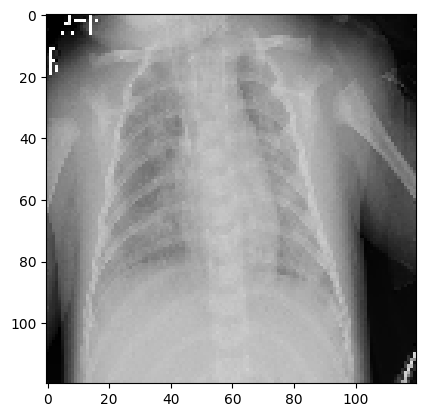

In [51]:
img2 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/val/PNEUMONIA/person1951_bacteria_4882.jpeg',target_size=(120,120))
imag2 = img_to_array(img2)
imaga2 = np.expand_dims(imag2,axis=0)

ypred2 = pnem_model.predict(imaga2)
print(ypred2)
a=ypred2[0]
if a>0.5:
      op="Pneumonia"   
else:
      op="Normal"
plt.imshow(img2)
print("RESULT : "+str(op))

1/1 [==============================] - 0s 29ms/step
[[0.00339588]]
RESULT : Normal


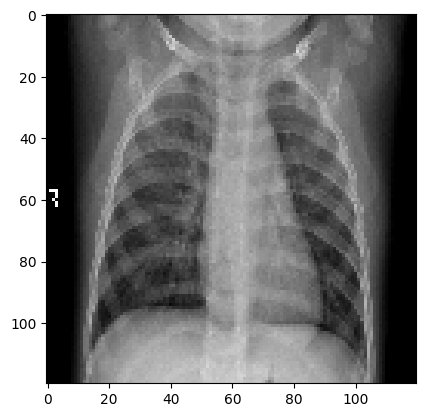

In [52]:
from tensorflow.keras.utils import load_img, img_to_array
img1 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/NORMAL/NORMAL2-IM-0378-0001.jpeg',target_size=(120,120))
imag1 = img_to_array(img1)
imaga1 = np.expand_dims(imag1,axis=0) 

ypred1 = pnem_model.predict(imaga1)
print(ypred1)
a=ypred1[0]
if a>0.4:
      op="Pneumonia"   
else:
      op="Normal"
plt.imshow(img1)
print("RESULT : "+str(op))

In [ ]:
pnem_model.save('pneumonia.h5')
pnem_model.save('pneumonia.keras')

# SKIN CANCER DETECTION

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

## Import Data

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER dataset/hmnist_28_28_RGB.csv')
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [3]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis

In [4]:
tabular_data = pd.read_csv('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER dataset/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [5]:
classes = {4: ('nv', ' melanocytic nevi'), 
           6: ('mel', 'melanoma'), 
           2: ('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

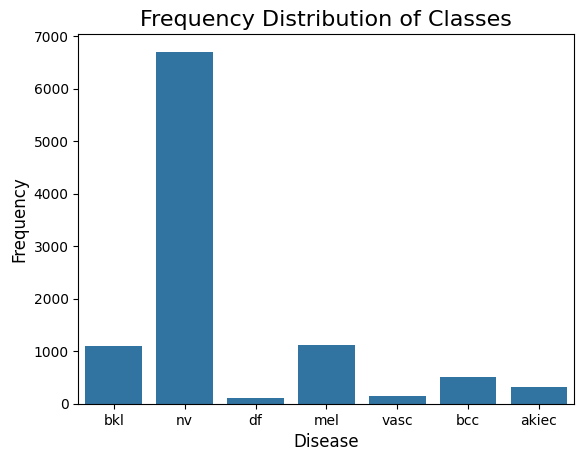

In [6]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

## Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

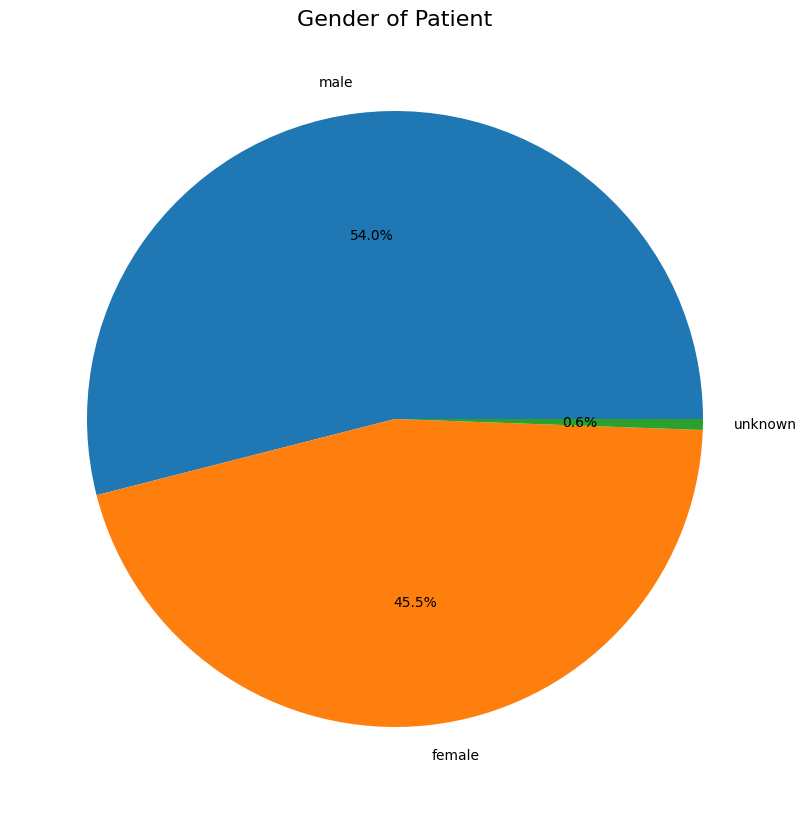

In [9]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

## Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

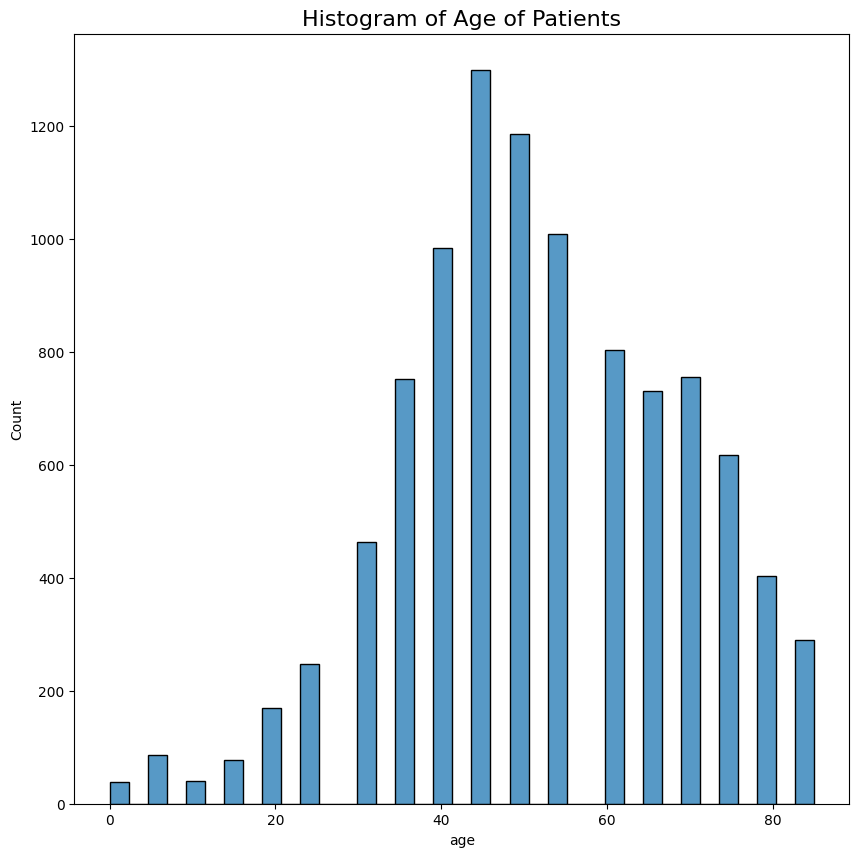

In [10]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

## Location of disease over Gender

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

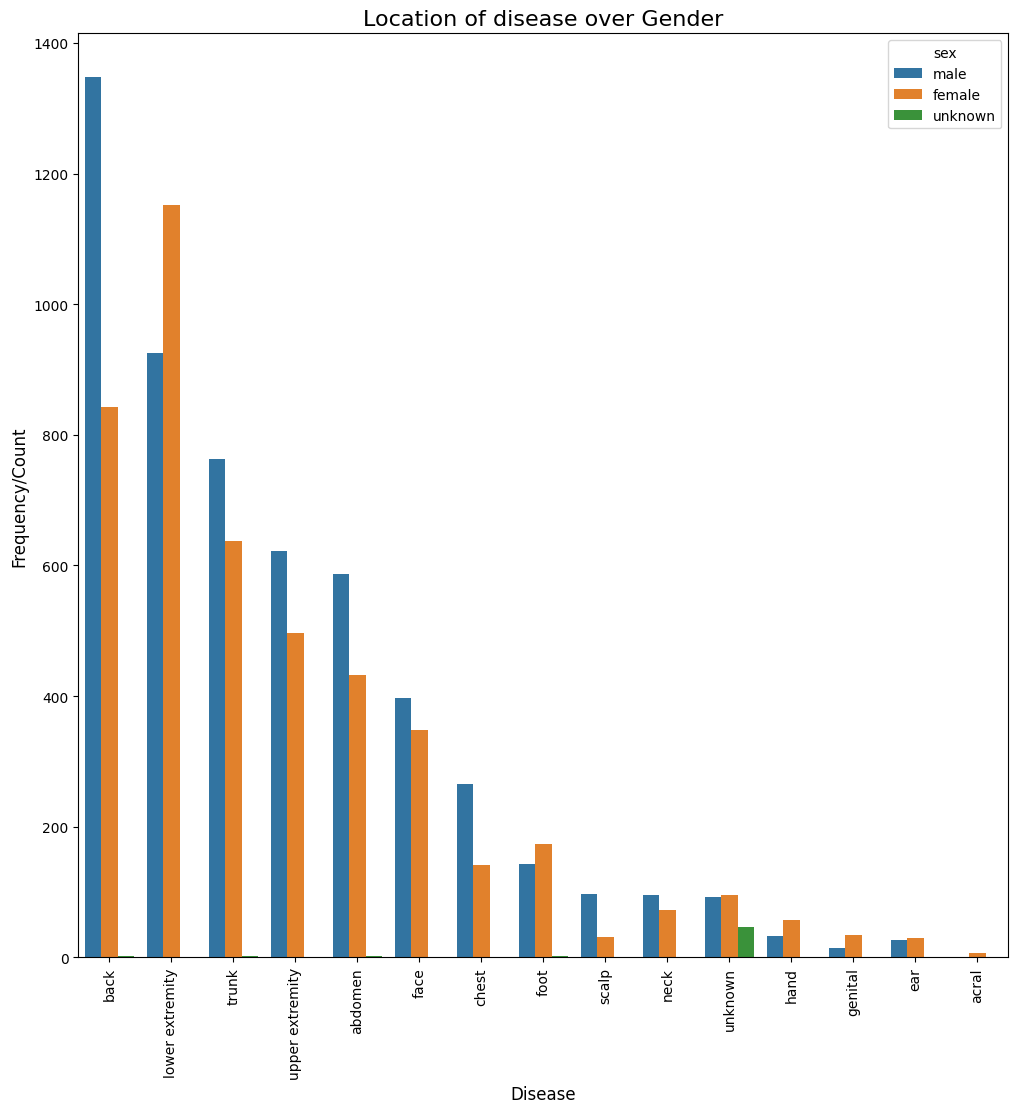

In [11]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling (To overcome class imbalace)

In [12]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [13]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


## Standardization and Splitting Data

In [14]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# CNN Model SKIN CANCER DETECTION

In [15]:
skc_model = Sequential()
skc_model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
skc_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
skc_model.add(MaxPool2D(pool_size = (2,2)))

skc_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
skc_model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
skc_model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
skc_model.add(Flatten())

skc_model.add(Dense(64, activation='relu'))
skc_model.add(Dense(32, activation='relu'))
skc_model.add(Dense(7, activation='softmax'))

In [16]:
skc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [17]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [18]:
skc_model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])

## Model Training

In [19]:
history = skc_model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20


234/235 [============================>.] - ETA: 0s - loss: 1.2512 - accuracy: 0.5088
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 10s 36ms/step - loss: 1.2502 - accuracy: 0.5092 - val_loss: 0.9132 - val_accuracy: 0.6511
Epoch 2/20
  3/235 [..............................] - ETA: 7s - loss: 0.9287 - accuracy: 0.6615

c:\users\mukhi2206\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


234/235 [============================>.] - ETA: 0s - loss: 0.7053 - accuracy: 0.7393
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 8s 35ms/step - loss: 0.7046 - accuracy: 0.7397 - val_loss: 0.5728 - val_accuracy: 0.7980
Epoch 3/20
235/235 [==============================] - ETA: 0s - loss: 0.4391 - accuracy: 0.8392
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 8s 36ms/step - loss: 0.4391 - accuracy: 0.8392 - val_loss: 0.4137 - val_accuracy: 0.8509
Epoch 4/20
234/235 [============================>.] - ETA: 0s - loss: 0.3059 - accuracy: 0.8900
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 8s 34ms/step - loss: 0.3054 - accuracy: 0.8902 - val_loss: 0.3288 - val_accuracy: 0.8686
Epoch 5/20
235/235 [==============================] - ETA: 0s - loss: 0.2242 - accuracy: 0.9218
Epoch 5: saving model to best_model.h5
235/235 [==============================] - 8s 33ms/step - loss: 0.2242 - ac

# Plot Accuracy and Loss

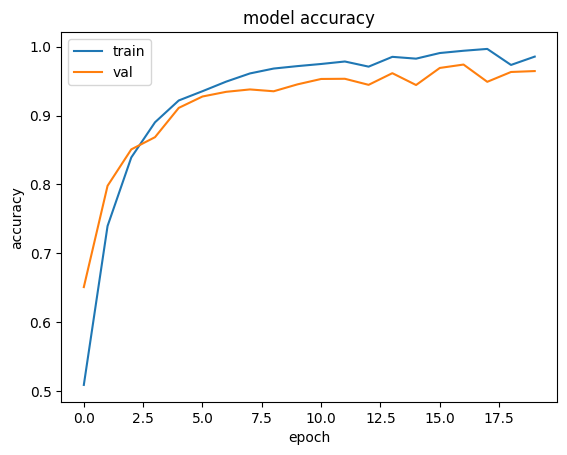

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

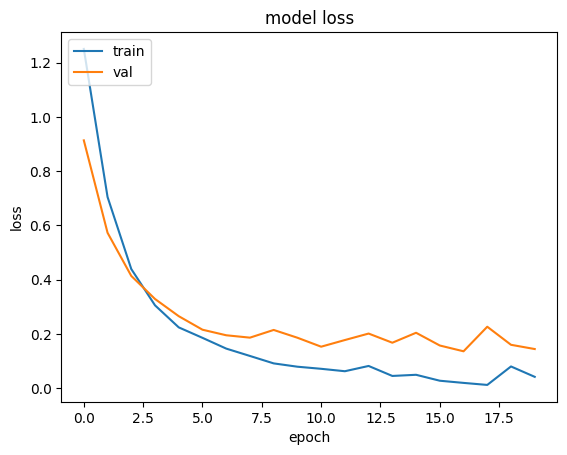

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
skc_model.load_weights('best_model.h5')

## Model Testing

In [23]:
loss, acc = skc_model.evaluate(X_test, Y_test, verbose=2)

294/294 - 1s - loss: 0.1307 - accuracy: 0.9665 - 1s/epoch - 4ms/step


# Predictions

1/1 [==============================] - 0s 141ms/step
('nv', ' melanocytic nevi')


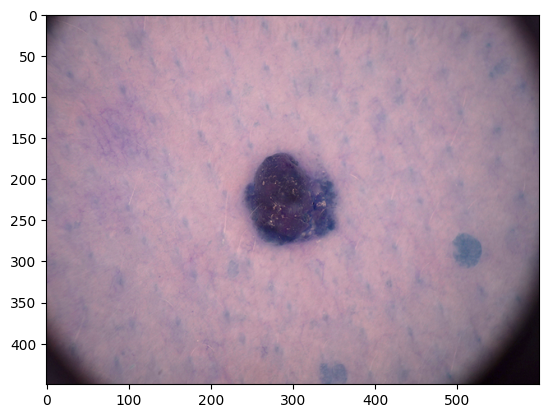

In [24]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER dataset/HAM10000_images_part_1/ISIC_0029291.jpg')
plt.imshow(img)
img = cv2.resize(img, (28, 28))
result = skc_model.predict(img.reshape(1, 28, 28, 3))
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_name = classes[class_ind]
print(class_name)

1/1 [==============================] - 0s 27ms/step
('bcc', ' basal cell carcinoma')


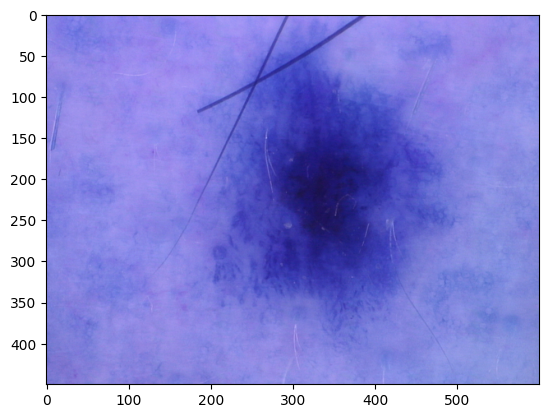

In [27]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER dataset/HAM10000_images_part_1/ISIC_0024306.jpg')
plt.imshow(img)
img = cv2.resize(img, (28, 28))
result = skc_model.predict(img.reshape(1, 28, 28, 3))
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_name = classes[class_ind]
print(class_name)

In [ ]:
skc_model.save('skincancer.h5')
skc_model.save('skincancer.keras')

# BONE FRACTURE DETECTION

In [4]:
import numpy as np
import pandas as pd
import cv2
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf

## Data

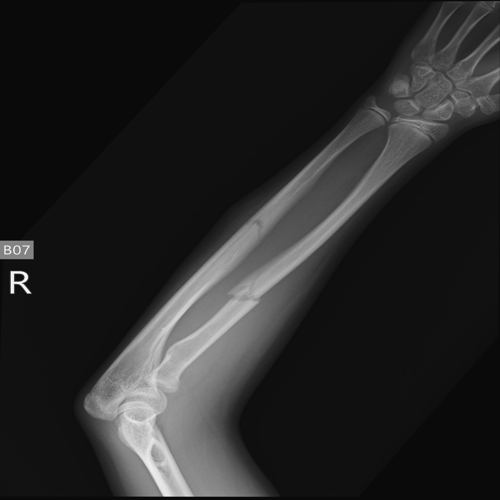

In [5]:
Fractured = PIL.Image.open('C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/train/fractured/11.jpg')
Fractured = Fractured.resize((500,500))
Fractured

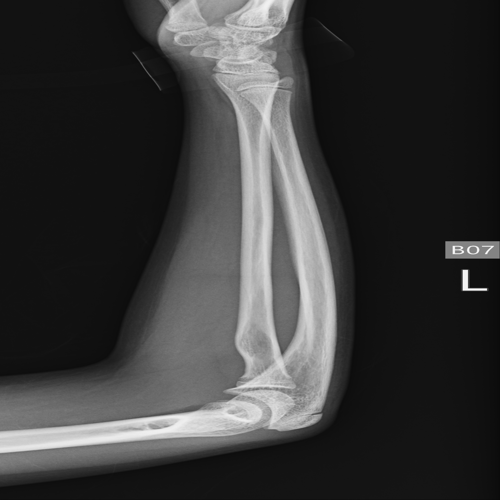

In [6]:
Normal = PIL.Image.open('C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/train/not fractured/10.jpg')
Normal = Normal.resize((500,500))
Normal

## Importing Data

In [7]:
train_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/train"
test_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/val"

## Data Visualization

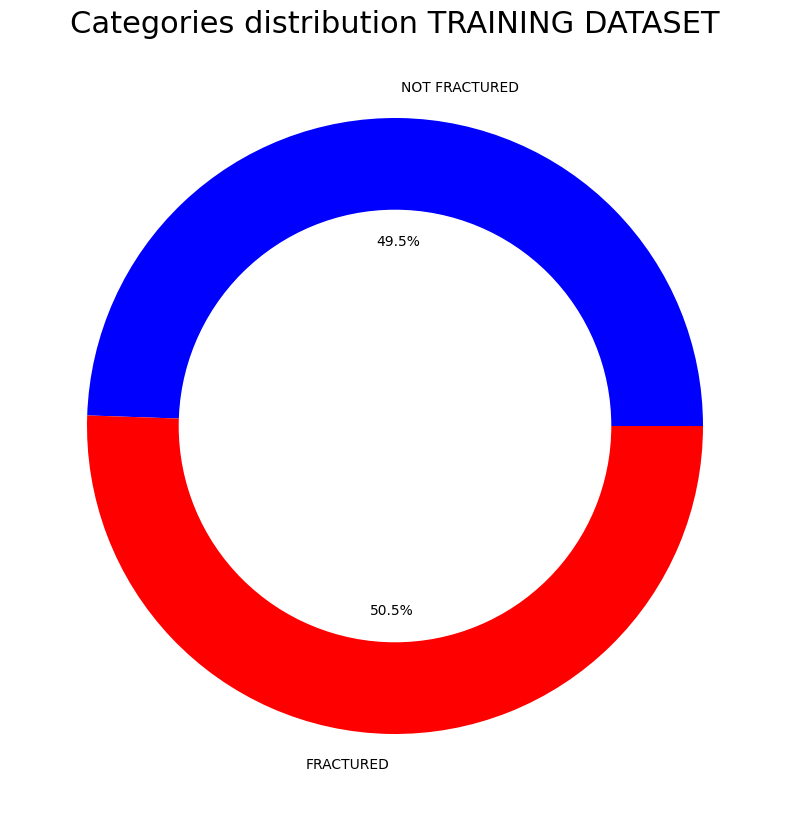

In [8]:
import os

train_normal = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/train/not fractured/'
normal_files = os.listdir(train_normal)
train_fractured= 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/train/fractured/'
fractured_files = os.listdir(train_fractured)

def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()
    
data = [len (normal_files) , len (fractured_files) ]
labels = ['NOT FRACTURED' , 'FRACTURED' ]
colors = ['blue','red']
plt_pie (data,labels,colors , 'Categories distribution TRAINING DATASET')

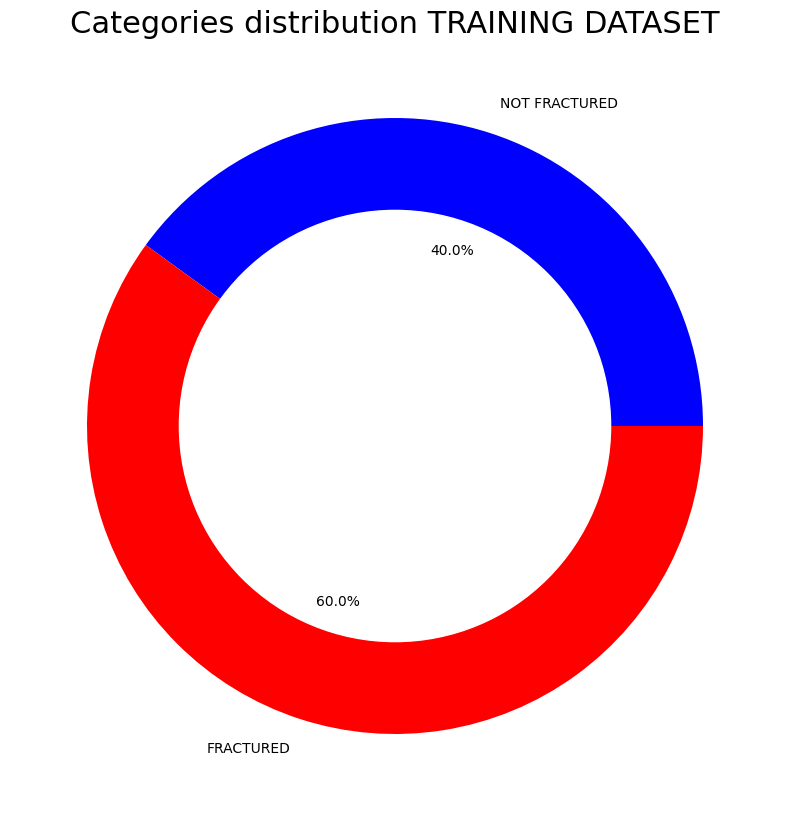

In [9]:
test_normal = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/val/not fractured/'
normal_files_test = os.listdir(test_normal)
test_fractured= 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/val/fractured/'
fractured_files_test = os.listdir(test_fractured)

def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()
    
data = [len (normal_files_test) , len (fractured_files_test) ]
labels = ['NOT FRACTURED' , 'FRACTURED' ]
colors = ['blue','red']
plt_pie (data,labels,colors , 'Categories distribution TRAINING DATASET')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

In [11]:
train_gen = ImageDataGenerator(rescale=1/255)
data_train = train_gen.flow_from_directory(train_dir, 
                                           target_size=(224,224),
                                           batch_size=8,
                                           class_mode="binary")

Found 8863 images belonging to 2 classes.


In [12]:
test_gen = ImageDataGenerator(rescale=1/255)
data_test = test_gen.flow_from_directory(test_dir, 
                                         target_size=(224,224),
                                         batch_size=8,
                                         class_mode="binary")

Found 600 images belonging to 2 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

input_shape = (224, 224, 3)

# CNN Model FRACTURE DETECTION

In [14]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(224,224,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2), 
                             
                             tf.keras.layers.Conv2D(128, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(256, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(512, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Flatten(), 
                             tf.keras.layers.Dense(256, activation= 'sigmoid'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy", 
              metrics= ["acc"])

## Model Training

In [17]:
history = model.fit_generator(data_train, epochs=8, validation_data = data_test) 

C:\Users\Mukhi2206\AppData\Local\Temp\ipykernel_7880\2419191207.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train, epochs=8, validation_data = data_test)


Epoch 1/8


1108/1108 [==============================] - 271s 243ms/step - loss: 0.6348 - acc: 0.6318 - val_loss: 0.6556 - val_acc: 0.6233
Epoch 2/8
1108/1108 [==============================] - 241s 217ms/step - loss: 0.4111 - acc: 0.8123 - val_loss: 0.5304 - val_acc: 0.7600
Epoch 3/8
1108/1108 [==============================] - 241s 217ms/step - loss: 0.1640 - acc: 0.9383 - val_loss: 0.7533 - val_acc: 0.7500
Epoch 4/8
1108/1108 [==============================] - 244s 220ms/step - loss: 0.0674 - acc: 0.9761 - val_loss: 0.7193 - val_acc: 0.8050
Epoch 5/8
1108/1108 [==============================] - 246s 222ms/step - loss: 0.0381 - acc: 0.9862 - val_loss: 0.7156 - val_acc: 0.7900
Epoch 6/8
1108/1108 [==============================] - 244s 221ms/step - loss: 0.0268 - acc: 0.9913 - val_loss: 0.9131 - val_acc: 0.7367
Epoch 7/8
1108/1108 [==============================] - 248s 224ms/step - loss: 0.0165 - acc: 0.9944 - val_loss: 0.6895 - val_acc: 0.8067
Epoch 8/8
1108/1108 [==================

## Plot Accuracy and Loss

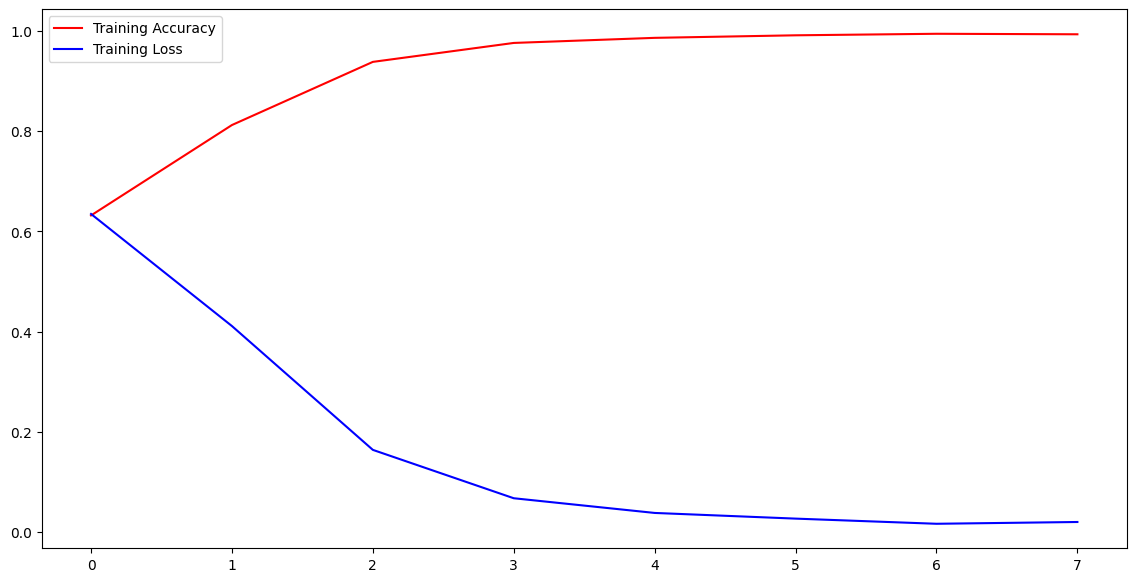

In [18]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r',label = "Training Accuracy")
plt.plot(epochs,loss,'b',label = "Training Loss")
plt.legend(loc='upper left')
plt.show()

## Model Score

In [19]:
model.evaluate(data_test)

75/75 [==============================] - 5s 60ms/step - loss: 0.9107 - acc: 0.8167


[0.9107043743133545, 0.8166666626930237]

In [20]:
model.evaluate(data_train)

1108/1108 [==============================] - 69s 62ms/step - loss: 0.0143 - acc: 0.9962


[0.014289218932390213, 0.9961638450622559]

In [21]:
predictions=model.predict(data_test)
predictions

75/75 [==============================] - 5s 63ms/step


array([[5.82294524e-06],
       [9.99863684e-01],
       [2.50847727e-01],
       [1.91658023e-09],
       [9.99825001e-01],
       [6.43314415e-05],
       [3.37037802e-01],
       [9.99959350e-01],
       [9.89179075e-01],
       [7.52898306e-02],
       [9.84526336e-01],
       [3.28806564e-02],
       [7.01484740e-01],
       [9.28998232e-01],
       [1.33502734e-04],
       [1.61446072e-02],
       [3.82302739e-02],
       [1.75975133e-02],
       [1.60033479e-02],
       [4.65165786e-02],
       [9.92598772e-01],
       [1.33537412e-07],
       [9.77412040e-10],
       [5.00831660e-03],
       [9.92461264e-01],
       [9.99995947e-01],
       [6.40930533e-02],
       [6.63595926e-03],
       [2.80758878e-03],
       [5.83744550e-04],
       [9.99999583e-01],
       [4.07430744e-05],
       [7.68052861e-02],
       [2.23264381e-01],
       [9.98047650e-01],
       [2.76022358e-04],
       [9.96719360e-01],
       [3.64430298e-06],
       [9.59890664e-01],
       [2.08779052e-03],


# Predictions

1/1 [==============================] - 0s 129ms/step
[[0.12148416]]
THE UPLOADED X-RAY IMAGE IS: Fracture


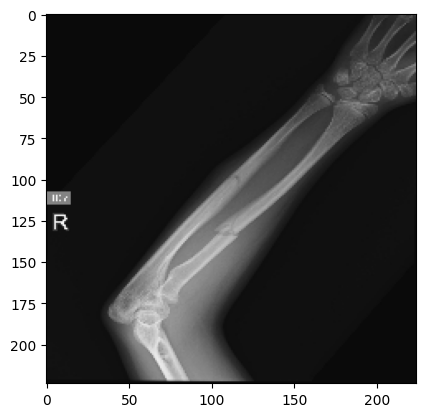

In [22]:
from tensorflow.keras.utils import load_img, img_to_array
img1 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/train/fractured/11.jpg',target_size=(224,224))
imag1 = img_to_array(img1)
imaga1 = np.expand_dims(imag1,axis=0) 
ypred = model.predict(imaga1)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"   
else:
      op="Normal"
plt.imshow(img1)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))

1/1 [==============================] - 0s 33ms/step
[[0.9999418]]
THE UPLOADED X-RAY IMAGE IS: Normal


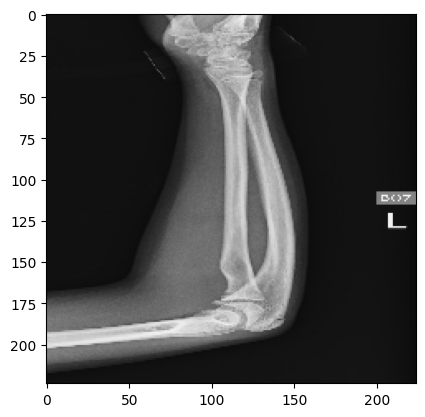

In [23]:
from tensorflow.keras.utils import load_img, img_to_array
img2 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE dataset/train/not fractured/10.jpg',target_size=(224,224))
imag2 = img_to_array(img2)
imaga2 = np.expand_dims(imag2,axis=0) 
ypred = model.predict(imaga2)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"   
else:
      op="Normal"
plt.imshow(img2)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))

In [ ]:
model.save('fracture.h5')
model.save('fracture.keras')